# Facial and Emotion Recognition system using CNN

Module imports

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

## Facial Recognition

#### Load and preprocess image data

In [3]:
def create_dataset_lists(dataset_dir, test_size=0.2):
    train_files = []
    val_files = []
    labels_train = []
    labels_val = []

    for class_index, class_name in enumerate(os.listdir(dataset_dir)):
        class_dir = os.path.join(dataset_dir, class_name)
        files = []
        for f in os.listdir(class_dir):
            if '.jpg' not in f:
                continue
            files.append(os.path.join(class_dir, f))
        train, val = train_test_split(files, test_size=test_size)

        train_files.extend(train)
        val_files.extend(val)
        labels_train.extend([class_index] * len(train))
        labels_val.extend([class_index] * len(val))

    return train_files, val_files, labels_train, labels_val

dataset_dir = 'faces'
train_files, val_files, labels_train, labels_val = create_dataset_lists(dataset_dir)


In [4]:
def file_image_generator(file_list, labels, batch_size=32):
    index = 0
    while True:
        img_batch = []
        label_batch = []
        for _ in range(batch_size):
            if index == len(file_list):
                index = 0
                temp = list(zip(file_list, labels))
                np.random.shuffle(temp)
                file_list, labels = zip(*temp)
            img = load_img(file_list[index], target_size=(100, 100))
            img = img_to_array(img)
            img /= 255.0
            img_batch.append(img)
            label_batch.append(to_categorical(labels[index], num_classes))
            index += 1
        yield np.array(img_batch), np.array(label_batch)

# Create instances of the ImageDataGenerators
train_gen = file_image_generator(train_files, labels_train, batch_size=32)
val_gen = file_image_generator(val_files, labels_val, batch_size=32)

#### Build the model

In [5]:
def build_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Train the model

In [6]:
from tensorflow.keras.models import load_model

model = load_model('CNN_NEW.keras')

In [7]:
train_model = True

In [8]:
num_classes = 3

if train_model:
    model = build_model(num_classes)
    
    history = model.fit(
        train_gen,
        steps_per_epoch=12,  
        epochs=5,
        validation_data=val_gen,
        validation_steps=4  
    )

Epoch 1/5
12/12 [==============================] - 8s 670ms/step - loss: 1.2949 - accuracy: 0.3177 - val_loss: 1.0165 - val_accuracy: 0.6484
Epoch 2/5
12/12 [==============================] - 7s 585ms/step - loss: 0.7502 - accuracy: 0.7370 - val_loss: 0.4024 - val_accuracy: 0.9219
Epoch 3/5
12/12 [==============================] - 6s 546ms/step - loss: 0.2648 - accuracy: 0.9323 - val_loss: 0.1877 - val_accuracy: 0.8984
Epoch 4/5
12/12 [==============================] - 6s 509ms/step - loss: 0.1035 - accuracy: 0.9688 - val_loss: 0.2392 - val_accuracy: 0.9531
Epoch 5/5
12/12 [==============================] - 6s 506ms/step - loss: 0.1636 - accuracy: 0.9479 - val_loss: 0.1385 - val_accuracy: 0.9531


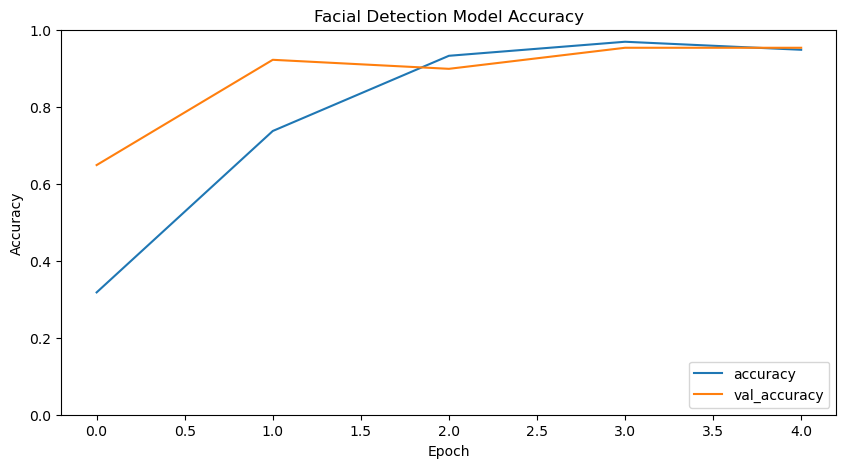

In [9]:
if train_model:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title('Facial Detection Model Accuracy')
    plt.show()

In [10]:
if train_model:
    model.save('CNN_NEW.keras')

## Emotion Detection

#### Load and Preprocess data

In [14]:
dataset_dir_emotion = 'emotion'
train_files_emotion, val_files_emotion, labels_train_emotion, labels_val_emotion = create_dataset_lists(dataset_dir_emotion)

train_gen_emotion = file_image_generator(train_files_emotion, labels_train_emotion, batch_size=32)
val_gen_emotion = file_image_generator(val_files_emotion, labels_val_emotion, batch_size=32)

#### Train the model

Epoch 1/10
12/12 [==============================] - 11s 921ms/step - loss: 1.1712 - accuracy: 0.3932 - val_loss: 1.0493 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 10s 915ms/step - loss: 0.9504 - accuracy: 0.5625 - val_loss: 0.7664 - val_accuracy: 0.6562
Epoch 3/10
12/12 [==============================] - 8s 670ms/step - loss: 0.6386 - accuracy: 0.7552 - val_loss: 0.5553 - val_accuracy: 0.8047
Epoch 4/10
12/12 [==============================] - 8s 713ms/step - loss: 0.3694 - accuracy: 0.8646 - val_loss: 0.2498 - val_accuracy: 0.9219
Epoch 5/10
12/12 [==============================] - 8s 702ms/step - loss: 0.2078 - accuracy: 0.9245 - val_loss: 0.2025 - val_accuracy: 0.9219
Epoch 6/10
12/12 [==============================] - 7s 640ms/step - loss: 0.1380 - accuracy: 0.9401 - val_loss: 0.3516 - val_accuracy: 0.8828
Epoch 7/10
12/12 [==============================] - 7s 659ms/step - loss: 0.1682 - accuracy: 0.9557 - val_loss: 0.0877 - val_accuracy: 0.9609
Epoc

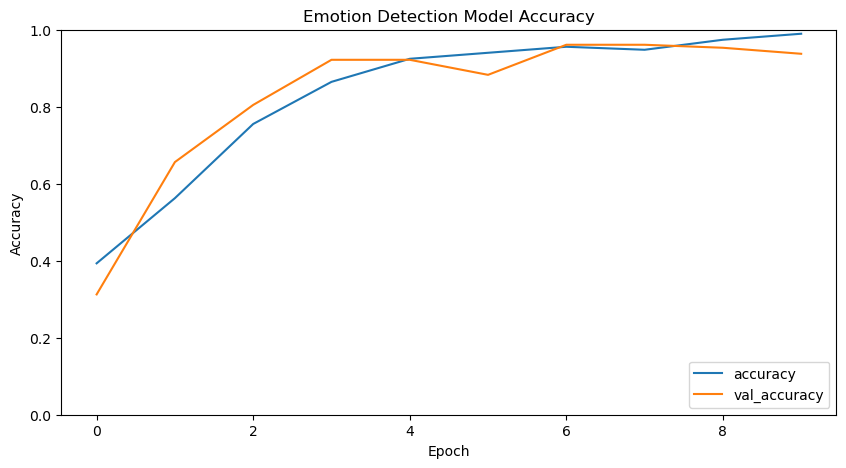

In [16]:
train_emotion_model = True
# model_emotion = load_model('EMOTION_CNN_NEW.keras')

num_classes = 3

if train_emotion_model:
    model_emotion = build_model(num_classes)
    
    emotion_history = model_emotion.fit(
        train_gen_emotion,
        steps_per_epoch=12,  
        epochs=10,
        validation_data=val_gen_emotion,
        validation_steps=4  
    )

    plt.figure(figsize=(10, 5))
    plt.plot(emotion_history.history['accuracy'], label='accuracy')
    plt.plot(emotion_history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title('Emotion Detection Model Accuracy')
    plt.show()

    model_emotion.save('EMOTION_CNN_NEW.keras')

## Testing using Realtime video feed

In [22]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

class_labels = ['Saransh','Pawan','Prabin']
class_labels_emotion = ['Happy','Sad','Neutral']


In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Couldn't retrieve frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Extract the face from the frame, resize it, and prepare it for classification
        face_img = frame[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (100, 100))
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        face_img = face_img.astype("float") / 255.0
        face_img = img_to_array(face_img)
        face_img = np.expand_dims(face_img, axis=0)

        # Predict the identity of the face
        predictions = model.predict(face_img)
        max_index = np.argmax(predictions[0])
        identity = class_labels[max_index]
        confidence = predictions[0][max_index]

        # Predict the emotion of the face
        predictions_emotion = model_emotion.predict(face_img)
        max_index_emotion = np.argmax(predictions_emotion[0])
        identity_emotion = class_labels_emotion[max_index_emotion]
        confidence_emotion = predictions_emotion[0][max_index_emotion]

        # Display the identity and confidence as text above the rectangle
        face_label = "{}: {:.2f}%".format(identity, confidence * 100)
        emotion_label = "Emotion: {} {:.2f}%".format(identity_emotion, confidence_emotion * 100)
        
        cv2.putText(frame, face_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(frame, emotion_label, (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)


    # Display the resulting frame
    cv2.imshow('Face & Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 58ms/step
